In [1]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [18]:
def ec_mov(x, t, epsilon=1.):
    r32 = sqrt(x[0]*x[0]+x[1]*x[1])**3
    ddx = -x[0]/r32
    ddy = -x[1]/r32
    return array([x[2],epsilon*x[3],ddx, ddy])

def energia(x, epsilon=1.):
    return 0.5*(x[2]*x[2]+epsilon*x[3]*x[3])-1./sqrt(x[0]*x[0]+x[1]*x[1])

def cond_ini(alpha, var=0.1):
    ang = alpha + var*randn()
    return array([cos(ang), sin(ang), 0.25, 0.25])

def p_rho(x):
    r = sqrt(x[:,0]*x[:,0]+x[:,1]*x[:,1])
    p = (x[:,2]*x[:,0]+x[:,3]*x[:,1])/r
    return r, p

def root_trayect(func, ptoi, ti, error=1e-5):
    while abs(ptoi[0])>error:
        tip1 = ti - (ptoi[0]/ptoi[2])
        paso = odeint(func, ptoi, [ti, tip1])
        ti, ptoi = tip1, paso[-1]
    return ti, ptoi

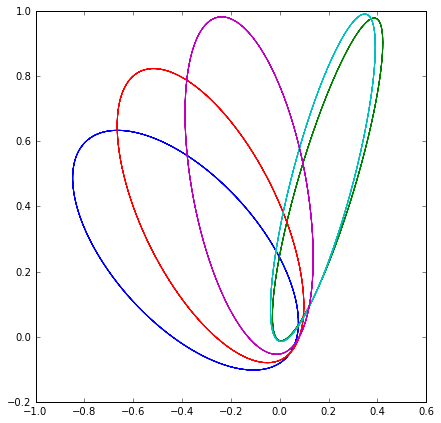

In [19]:
t = linspace(0, 10, 10000)
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)

for i in range(5):
    p_ini = cond_ini(pi/4.,pi)
    sol = odeint(ec_mov, p_ini, t, args=(1.,), atol=1e-11, rtol=1e-11)
    ax.plot(sol[:,0],sol[:,1])

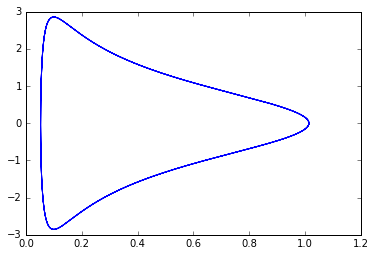

In [20]:
r, p = p_rho(sol)
plot(r, p)

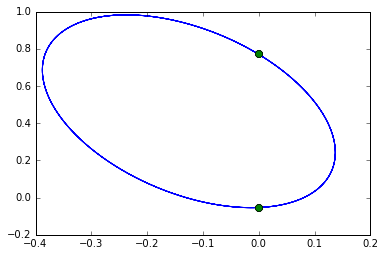

In [21]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,4))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(ec_mov, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

plot(sol[:,0],sol[:,1])
plot(puntos[:,0], puntos[:,1], 'o', markersize=7)

(-2, 2)

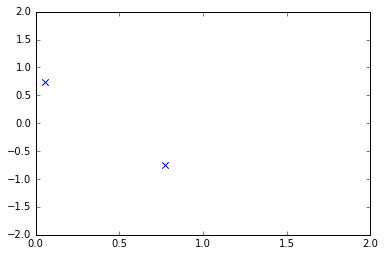

In [22]:
r, pr = p_rho(puntos)
plot(r, pr,'x')
xlim(0,2)
ylim(-2,2)

In [37]:
def mapeo_poincare(func, alpha, delta, eps, t, N):
    fig = figure(figsize=(21,9))
    ax = fig.add_subplot(221)
    bx = fig.add_subplot(222)
    cx = fig.add_subplot(223)
        
    fig2 = figure(figsize=(12,12))
    dx = fig2.add_subplot(111)
    for k in range(N):
        p_ini = cond_ini(alpha, delta)
        sol = odeint(func, p_ini, t, args=(eps,), atol=1e-11, rtol=1e-11)
        r, pr = p_rho(sol)
        ax.plot(sol[:,0],sol[:,1])
        bx.plot(r, pr)
        bx.set_ylim(-50,50)
        num = len(t)
        raices, puntos = zeros(num), zeros((num,4))
        j = 0
        for i in range(num-1):
            if sol[i][0]*sol[i+1][0] < 0:
                raices[j], puntos[j] = root_trayect(func, sol[i], t[i], error=1e-4)
                j += 1

        raices, puntos = raices[0:j], puntos[0:j]
        ax.plot(puntos[:,0], puntos[:,1], 'o', markersize=7)
        r, p = p_rho(puntos)
        cx.plot(r, p, '.', markersize=2)
        cx.set_ylim(-6,6)
        

        dx.plot(r, p, '.', markersize=2)
        dx.set_ylim(-6,6)

/Users/diego/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


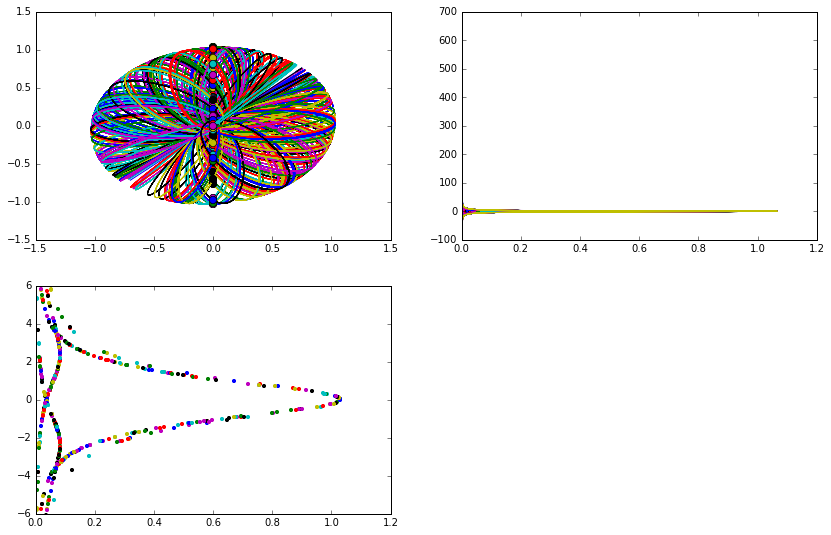

In [25]:
t = arange(0.0, 10.0, 0.0001)
mapeo_poincare(ec_mov, pi/4., pi, 1, t, 300)

/Users/diego/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in divide


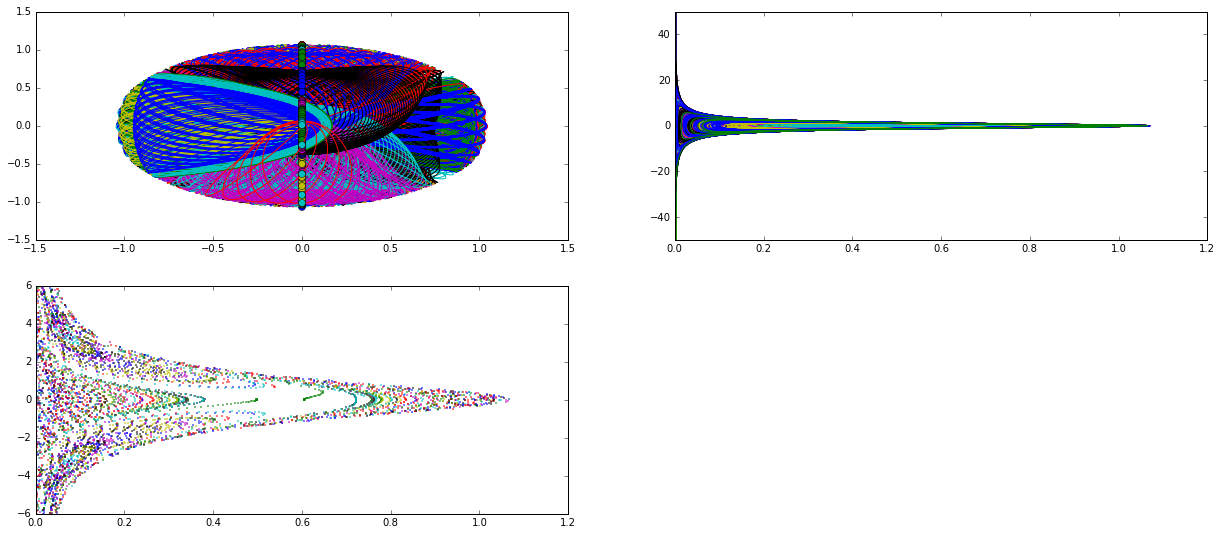

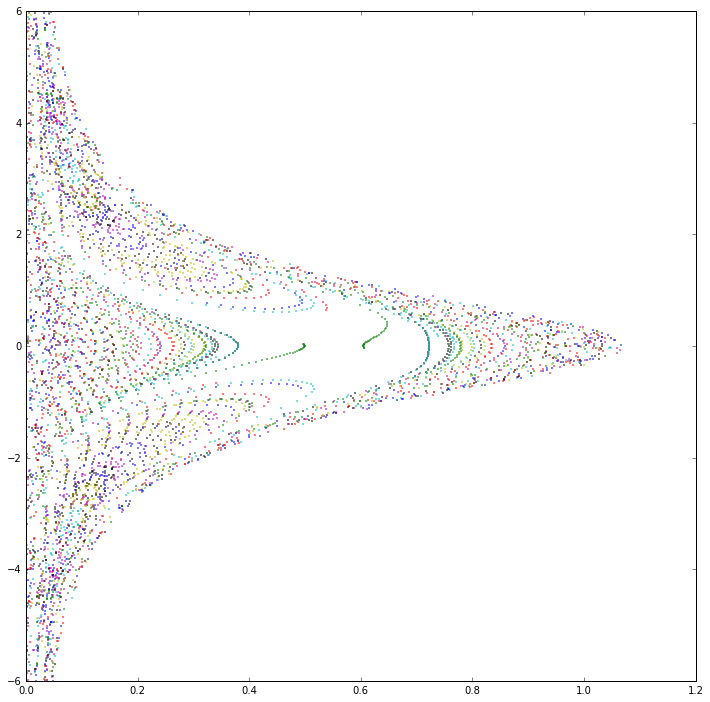

In [38]:
t = arange(0.0, 100.0, 0.0001)
mapeo_poincare(ec_mov, pi/4., pi, 1.1, t, 100)